In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 36)

warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
#Load data to Pandas DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/atreish/AIM_5015_Automated_Machine_Learning/main/hotel_bookings.csv')

#What is the shape of the data 
data.shape

(119390, 32)

In [4]:
data1 = data.copy()

In [5]:
#Print the Column Names
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
#Details on the number of Null values and Data Type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
'''There are 32 columns in the data with 13 categorical (dtype=object) and 19 numeric 
(dtype=int64/float 64). Missing values are in both categorical and in numeric. Before we 
address these, let's have a preview of the dataframe'''

data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


```As we can see here there are multiple bookings for the same day, in addition there are 3 years worth of data.```

# Numeric Data 

In [8]:
numerics = ['int64', 'float64']
numeric_data = data.select_dtypes(include=numerics)
numeric_data.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [9]:
#Description of the Numeric Data
numeric_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Visualization of Numeric Data

In [10]:
'''Many of these numeric values are in fact codes for another category. Such as binary classifications and 
some have seemingly irrelavent data such as day of the month etc.'''

#Binary
numeric_data.is_canceled.unique()

array([0, 1])

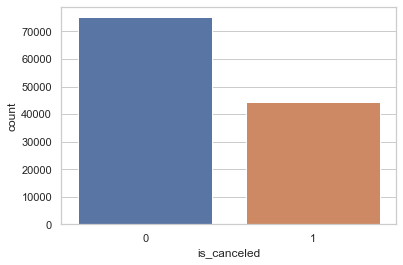

In [11]:
sns.countplot(data=numeric_data, x = 'is_canceled')
plt.show()

In [12]:
#Three Classes. 3 years of data
numeric_data.arrival_date_year.unique()

array([2015, 2016, 2017])

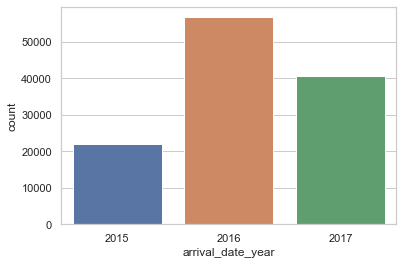

In [13]:
sns.countplot(data=numeric_data, x = 'arrival_date_year')
plt.show()

In [14]:
#Only 52 weeks of the year
numeric_data.arrival_date_week_number.unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26])

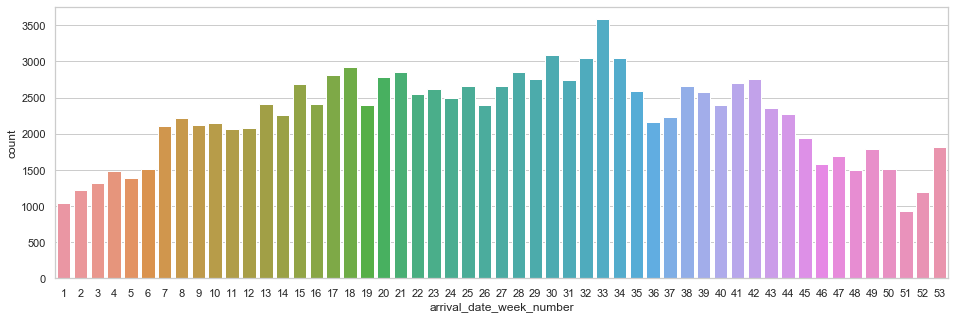

In [15]:
plt.figure(figsize=(16,5))
sns.countplot(data=numeric_data, x='arrival_date_week_number')
plt.show()

In [16]:
#Only 31 days of the month
numeric_data.arrival_date_day_of_month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

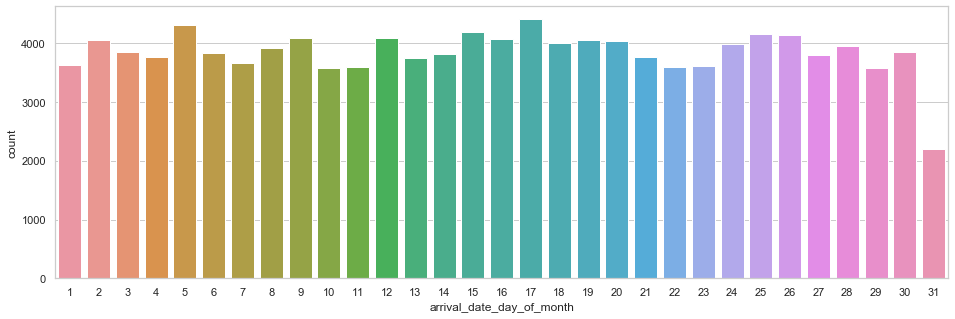

In [17]:
plt.figure(figsize=(16,5))
sns.countplot(data=numeric_data, x='arrival_date_day_of_month')
plt.show()

In [18]:
#Binary
numeric_data.is_repeated_guest.unique()

array([0, 1])

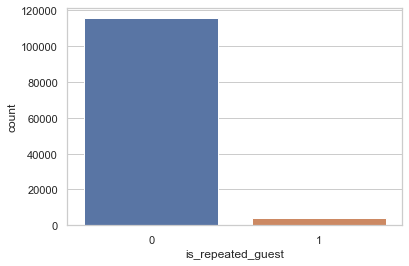

In [19]:
sns.countplot(data=numeric_data, x='is_repeated_guest')
plt.show()

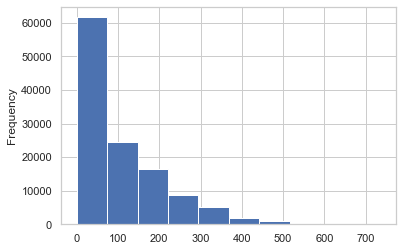

In [20]:
numeric_data['lead_time'].plot(kind = 'hist')

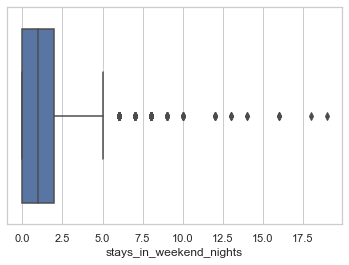

In [21]:
sns.boxplot(x=numeric_data['stays_in_weekend_nights'])

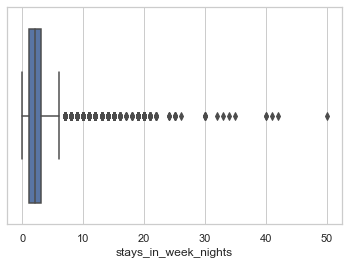

In [22]:
sns.boxplot(x=numeric_data['stays_in_week_nights'])

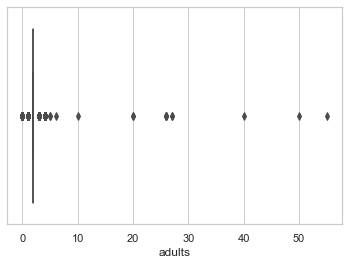

In [23]:
sns.boxplot(x=numeric_data['adults'])

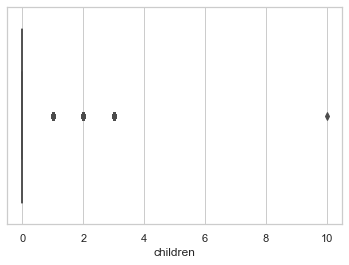

In [24]:
sns.boxplot(x=numeric_data['children'])

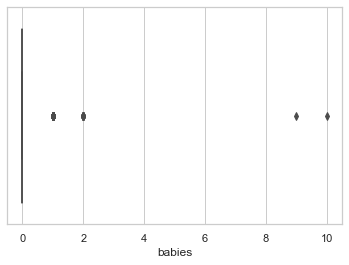

In [25]:
sns.boxplot(x=numeric_data['babies'])

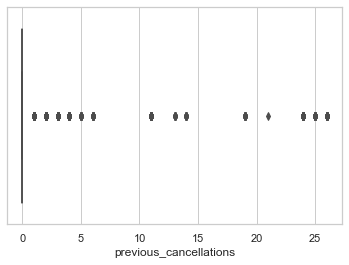

In [26]:
sns.boxplot(x=numeric_data['previous_cancellations'])

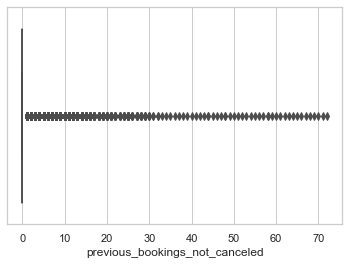

In [27]:
sns.boxplot(x=numeric_data['previous_bookings_not_canceled'])

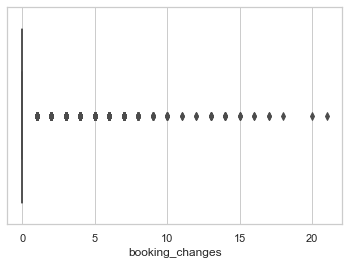

In [28]:
sns.boxplot(x=numeric_data['booking_changes'])

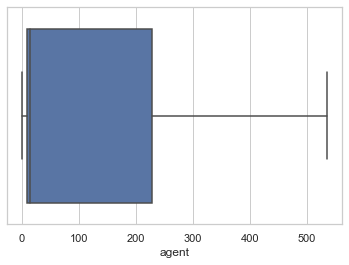

In [29]:
sns.boxplot(x=numeric_data['agent'])

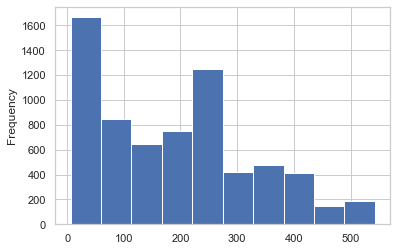

In [30]:
numeric_data['company'].plot(kind = 'hist')

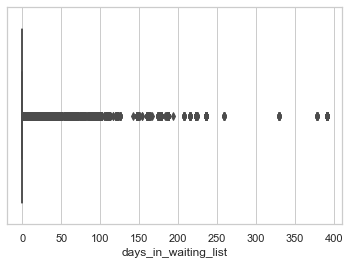

In [31]:
sns.boxplot(x=numeric_data['days_in_waiting_list'])

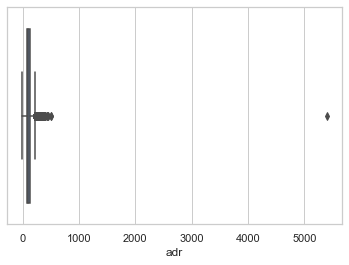

In [32]:
sns.boxplot(x=numeric_data['adr'])

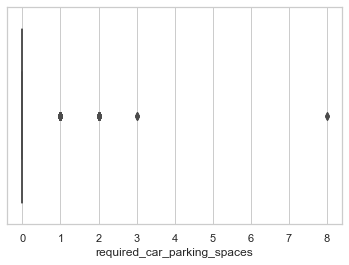

In [33]:
sns.boxplot(x=numeric_data['required_car_parking_spaces'])

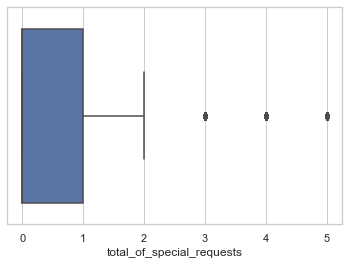

In [34]:
sns.boxplot(x=numeric_data['total_of_special_requests'])

# Categorical Data

In [35]:
categrocial_data = data.select_dtypes(include=object)
categrocial_data.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [36]:
print(categrocial_data.hotel.value_counts())
print('')
print(categrocial_data.arrival_date_month.value_counts())
print('')
print(categrocial_data.meal.value_counts())
print('')
print(categrocial_data.country.value_counts())
print('')
print(categrocial_data.market_segment.value_counts())
print('')
print(categrocial_data.distribution_channel.value_counts())
print('')
print(categrocial_data.reserved_room_type.value_counts())
print('')
print(categrocial_data.assigned_room_type.value_counts())
print('')
print(categrocial_data.deposit_type.value_counts())
print('')
print(categrocial_data.customer_type.value_counts())
print('')
print(categrocial_data.reservation_status.value_counts())
print('')
print(categrocial_data.reservation_status_date.value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
BHS        1
ATF        1
NCL        1
PLW        1
BWA        1
Name: country, Length: 177, dtype: int64

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

# Visualize the Categorical Data

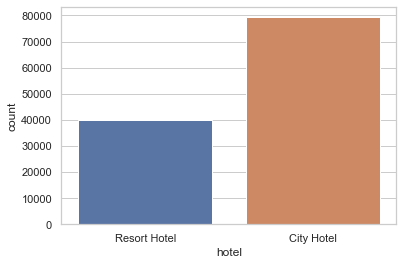

In [37]:
sns.countplot(data=data, x = 'hotel')
plt.show()

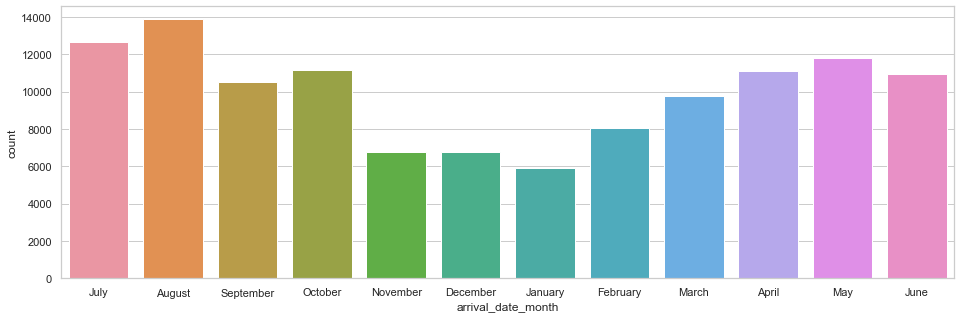

In [38]:
plt.figure(figsize=(16,5))
sns.countplot(data=data, x = 'arrival_date_month')
plt.show()

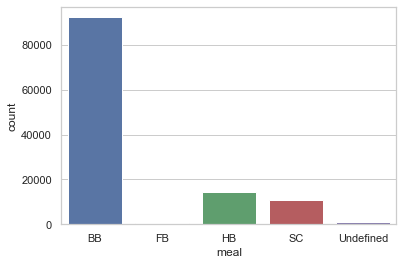

In [39]:
sns.countplot(data=data, x = 'meal')
plt.show()

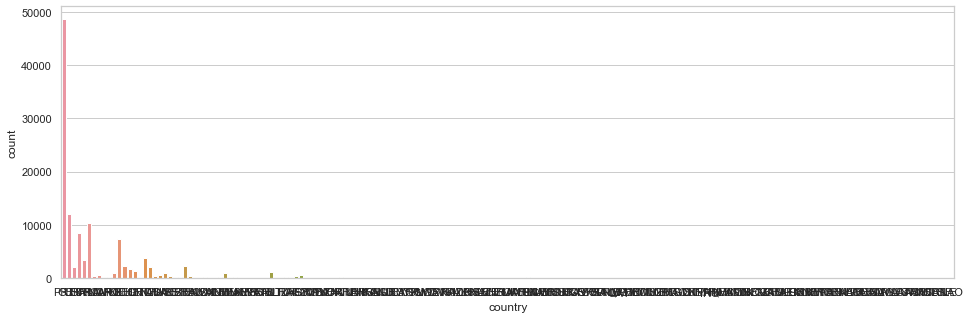

In [40]:
plt.figure(figsize=(16,5))
sns.countplot(data=data, x = 'country')
plt.show()

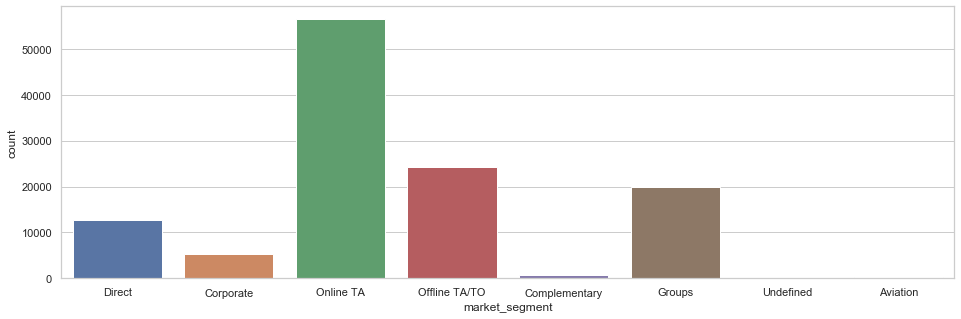

In [41]:
plt.figure(figsize=(16,5))
sns.countplot(data=data, x = 'market_segment')
plt.show()

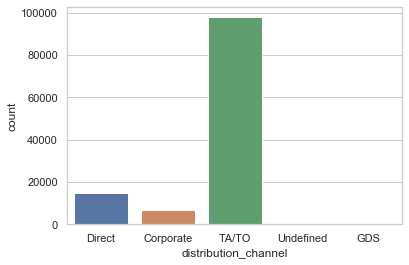

In [42]:
sns.countplot(data=data, x = 'distribution_channel')
plt.show()

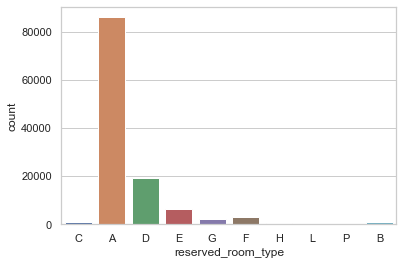

In [43]:
sns.countplot(data=data, x = 'reserved_room_type')
plt.show()

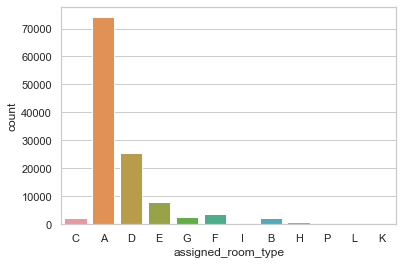

In [44]:
sns.countplot(data=data, x = 'assigned_room_type')
plt.show()

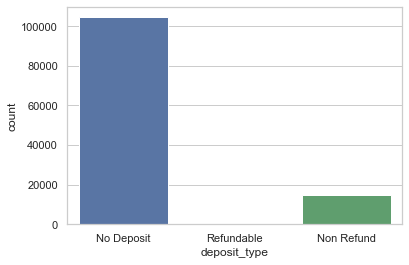

In [45]:
sns.countplot(data=data, x='deposit_type')
plt.show()

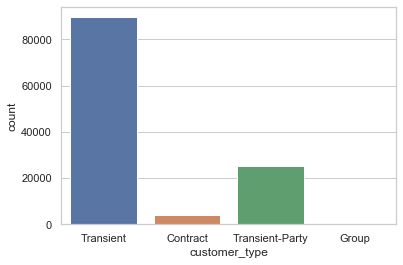

In [46]:
sns.countplot(data=data, x='customer_type')
plt.show()

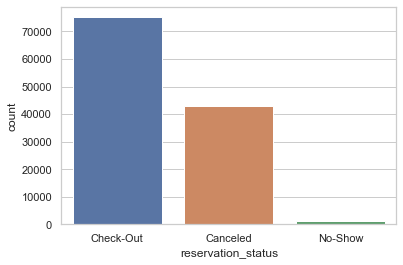

In [47]:
sns.countplot(data=data, x = 'reservation_status')
plt.show()

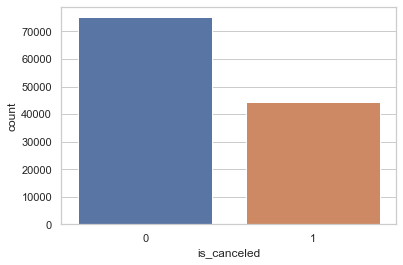

In [48]:
sns.countplot(data=data, x = 'is_canceled')
plt.show()

# EDA using Raw Data without Data Processing

```In this section we will explore some questions and visualizations of raw data.
1. Correlation Matrix
2. Countplot of Number of Bookings by Hotel Type & by Cancellations
3. Type of hotel for each month and the % of cancellations
4. Number of Hotel Bookings by hotel type by month 
5. % of Market Segment cancellation by Month
6. Price per room per night by Hotel Type
7. Average Number of Guests per Month by Hotel Type```

# 1. Correlation Matrix

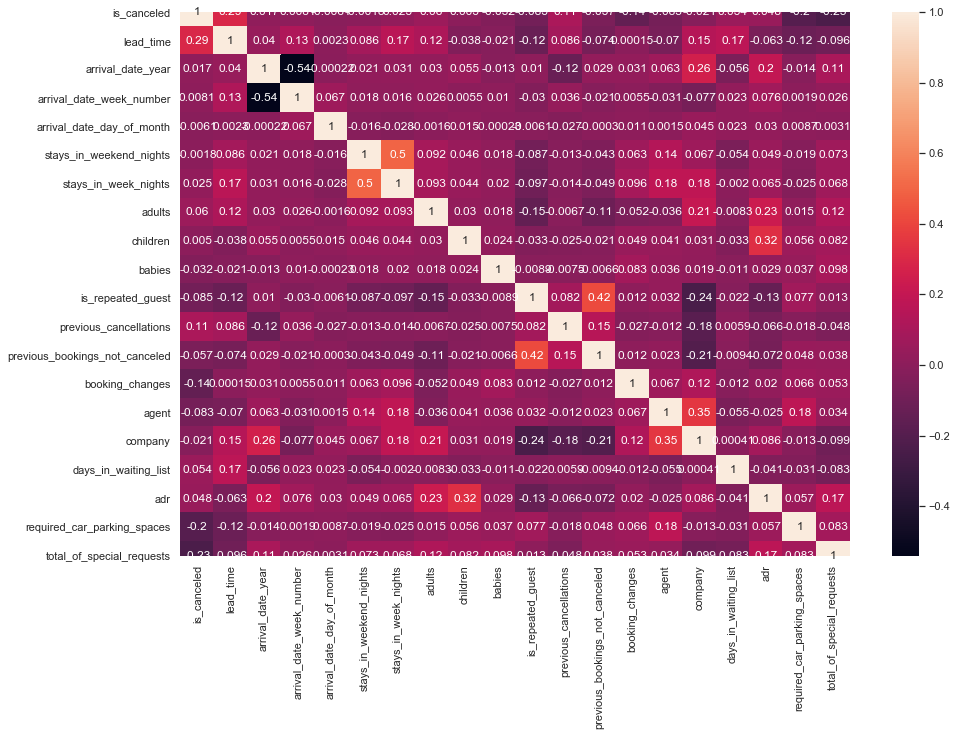

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

# 2. Countplot of Number of Bookings by Hotel Type

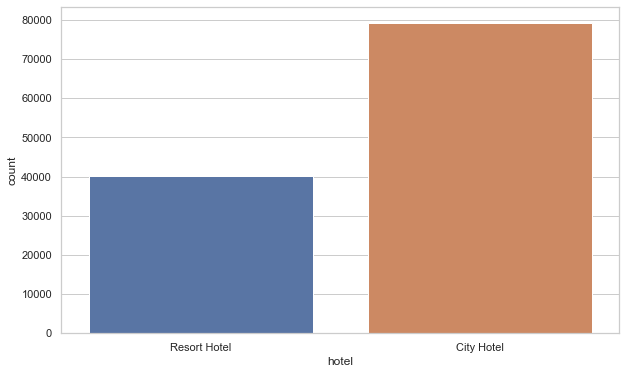

In [50]:
plt.figure(figsize = (10,6))
sns.countplot(x ='hotel',data=data)

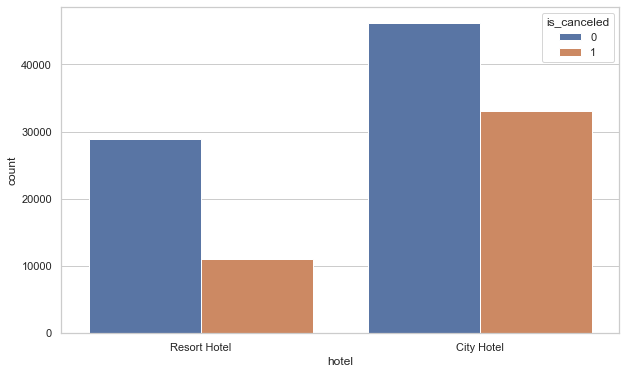

In [51]:
plt.figure(figsize = (10,6))
sns.countplot(x ='hotel', hue='is_canceled',data=data)

# 3. Type of hotel for each month and the % of cancellations

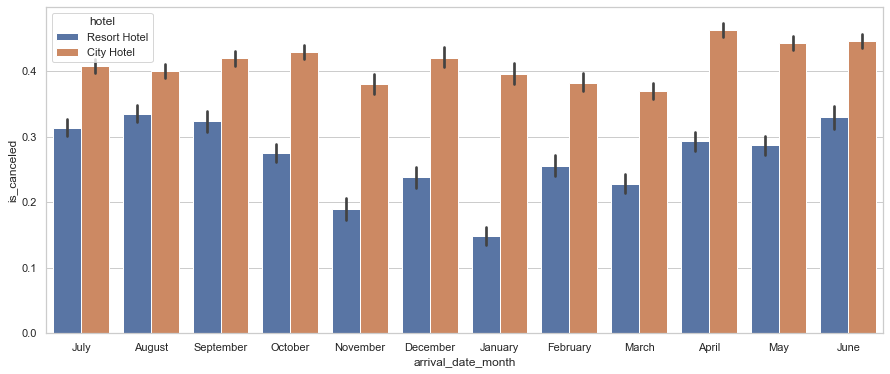

In [52]:
plt.figure(figsize = (15,6))
sns.barplot(x ='arrival_date_month', y='is_canceled', hue='hotel', data=data)

# 4. Number of Hotel Bookings by hotel type by month

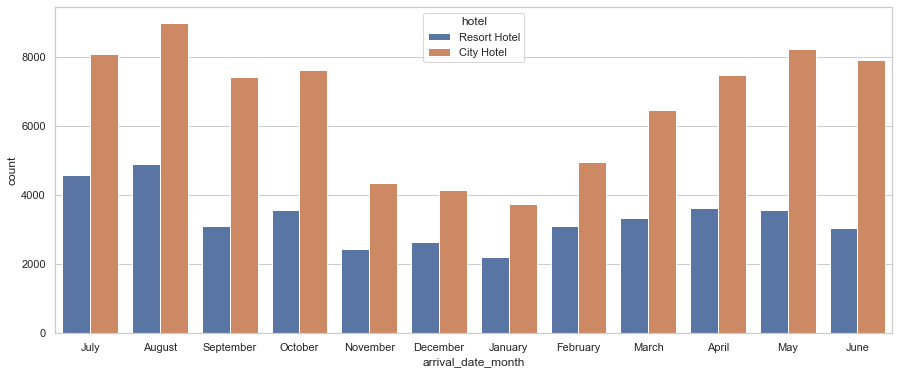

In [53]:
plt.figure(figsize = (15,6))
sns.countplot(x ='arrival_date_month', hue='hotel', data=data)

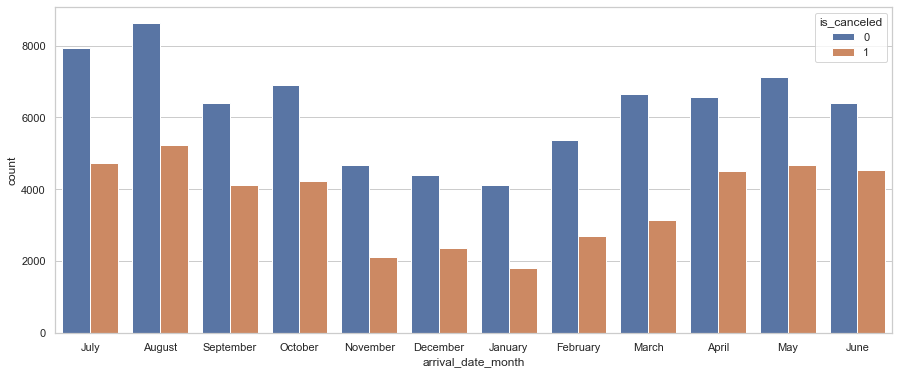

In [54]:
#Booking Status by month 

plt.figure(figsize = (15,6))
sns.countplot(x =data['arrival_date_month'], hue='is_canceled', data=data)

# 5. % of Market Segment cancellation by Month

/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'outer'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


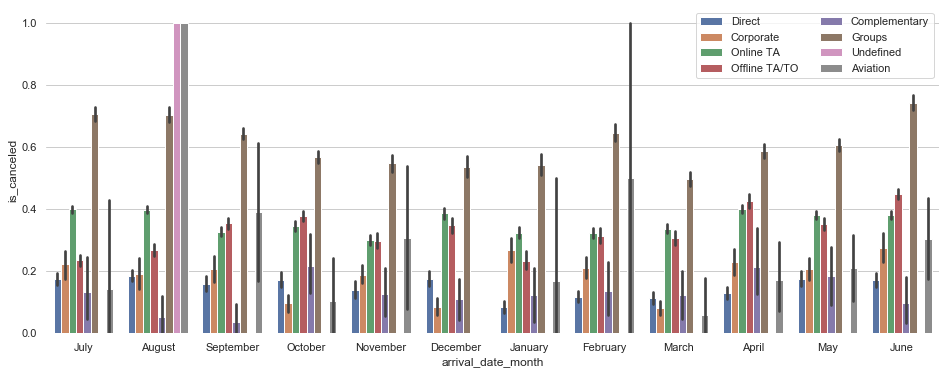

In [55]:
plt.figure(figsize = (16,6))
sns.barplot(x ='arrival_date_month', y='is_canceled', hue='market_segment', data=data)
plt.legend(ncol = 2, loc = 'outer')
sns.despine(left = True, bottom = True)

/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'outer'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


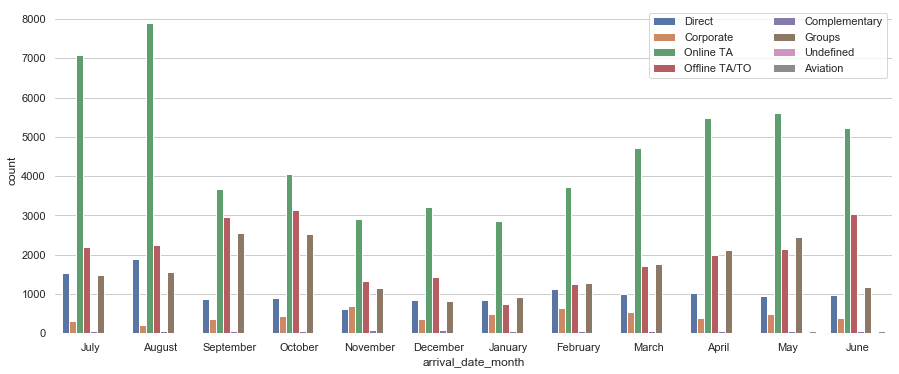

In [56]:
#Count of Number of Cancellations per month by 
plt.figure(figsize = (15,6))
sns.countplot(x ='arrival_date_month', hue='market_segment', data=data)
plt.legend(ncol = 2, loc = 'outer')
sns.despine(left = True, bottom = True)

# 6. Price per room per night by Hotel Type

In [57]:
#Let us divide by Hotel type first 
rh = data.loc[(data["hotel"] == "Resort Hotel")]
ch = data.loc[(data["hotel"] == "City Hotel")]

#Average prices
rh_ppp = sum(rh['adr']) / sum(rh["adults"]) 
ch_ppp = sum(ch['adr']) / sum(ch["adults"]) 

print("""Resort hotel average price: ${:.2f} per night per person.
City hotel average price: ${:.2f} per night per person.""".format(rh_ppp, ch_ppp))

Resort hotel average price: $50.85 per night per person.
City hotel average price: $56.89 per night per person.


(0, 160)

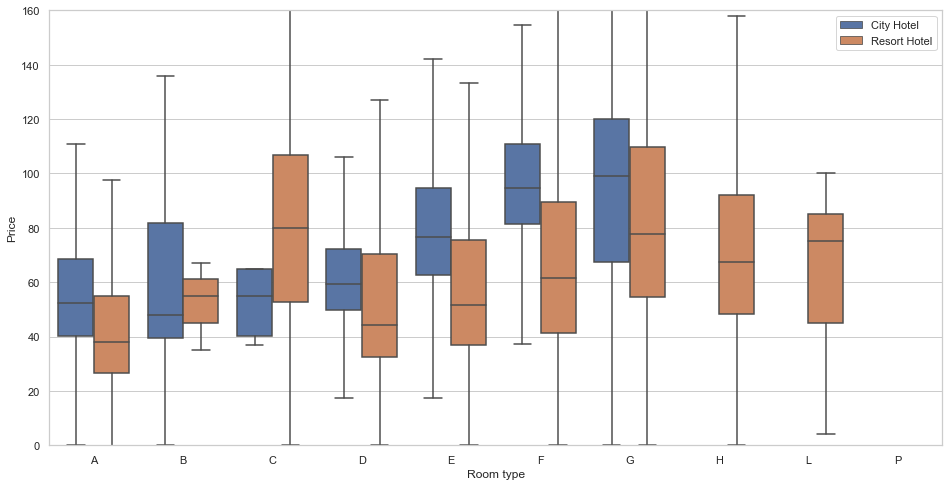

In [58]:
#Add ppp to original dataframe to be called
data["adr_ppp"] = data["adr"] / (data["adults"]) 

#Create room prices slice of dataframe
room_prices = data[["hotel", "reserved_room_type", "adr_ppp"]].sort_values("reserved_room_type")

#Plot the BoxPlot of Data of ppp for the Room Type and Hotel Type
plt.figure(figsize=(16, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_ppp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.xlabel("Room type")
plt.ylabel("Price")
plt.legend(loc="upper right")
plt.ylim(0, 160)

# 7. Average Number of Guests per Month by Hotel Type

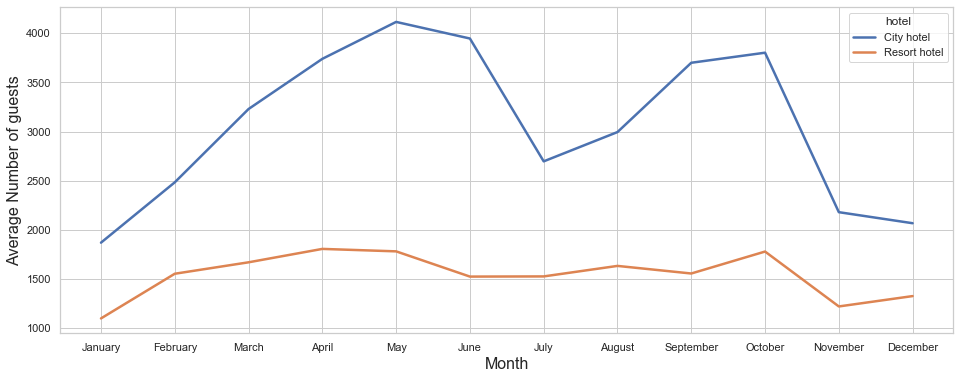

In [59]:
# Create a DateFrame with the relevant data:
resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})
city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

#show figure:
plt.figure(figsize=(16, 6))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.xlabel("Month", fontsize=16)
plt.ylabel("Average Number of guests", fontsize=16)
plt.show()

```Now that we have done EDA on the Raw Data and now we will begin the Data cleaning/pre-processing process
and then re-Run most of our EDA to discover any changes```

# Data Preprocessing

In [60]:
data1.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [61]:
'''Since we see several fields that have missing values. We will first address these. 
1. There are 4 entries that have NAN values for children and as we have seen usually there is no children 
so what we will do is imput 0.
2. Country is a unique code for country of origin and we will not do analysis on this so we will add unknown
3. Agent is the type of agency the booking was made from. These are again unnecessary to our analysis so we will 
fill these with unknown
4. Company is unnecessay but has so many missing values that we will delete this feature entirely. 
'''
nan_replacements = {"children:": 0,"country": "Unknown", "agent": 0, }
data1 = data1.fillna(nan_replacements)

In [62]:
#Let us drop company and some other columns we do not use for our analysis
data1 = data1.drop(columns=['company','booking_changes','days_in_waiting_list',
                            'required_car_parking_spaces','reservation_status_date'])
data1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'agent', 'customer_type', 'adr',
       'total_of_special_requests', 'reservation_status'],
      dtype='object')

In [63]:
#Count only the Non-Cancelled bookings
data1 = data1[data1['is_canceled'] == 0]
data1.shape

(75166, 27)

In [64]:
#Change data types so that we have clearer Confusion Matrix
data1.astype({'arrival_date_year': 'object','arrival_date_week_number': 'object',
              'arrival_date_day_of_month': 'object','is_repeated_guest': 'object',
             'agent': 'object'}).dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                  object
arrival_date_month                 object
arrival_date_week_number           object
arrival_date_day_of_month          object
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
deposit_type                       object
agent                              object
customer_type                     

In [65]:
rh = data1.loc[(data1["hotel"] == "Resort Hotel")] 
ch = data1.loc[(data1["hotel"] == "City Hotel")]

# EDA with Cleaned Data

# 1. Correlation Matrix

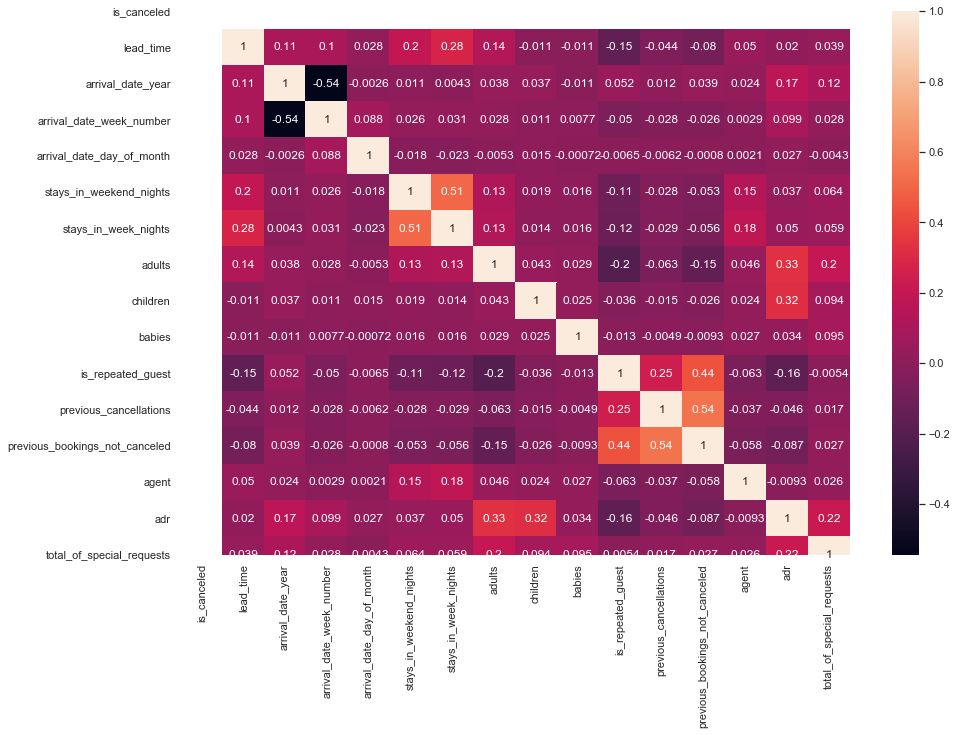

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(data1.corr(),annot=True)

```Smaller correlation Matrix overall as we have less numeric data but still shows little to no correlations
between features```

# 2. Countplot of Number of Bookings by Hotel Type

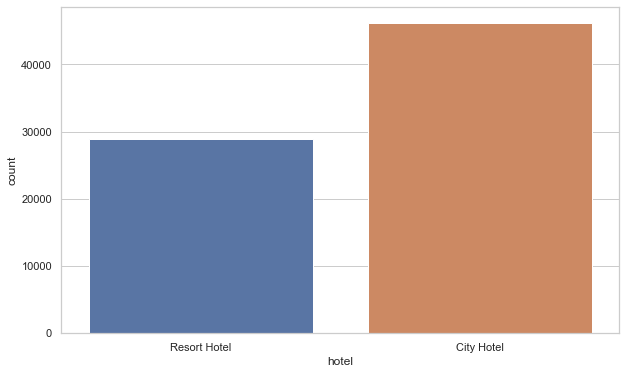

In [67]:
plt.figure(figsize = (10,6))
sns.countplot(x ='hotel',data=data1)

In [68]:
print(data['hotel'].value_counts())
print(data1['hotel'].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
City Hotel      46228
Resort Hotel    28938
Name: hotel, dtype: int64


```This is dramatic difference in comparison with the original dataset as there are thousnds of cancelled 
bookings for both City Hotel (79330 vs 46228) and Resort Hotel (40060 vs 28938)```

# 3. Countlot of the Type of Hotel by Month

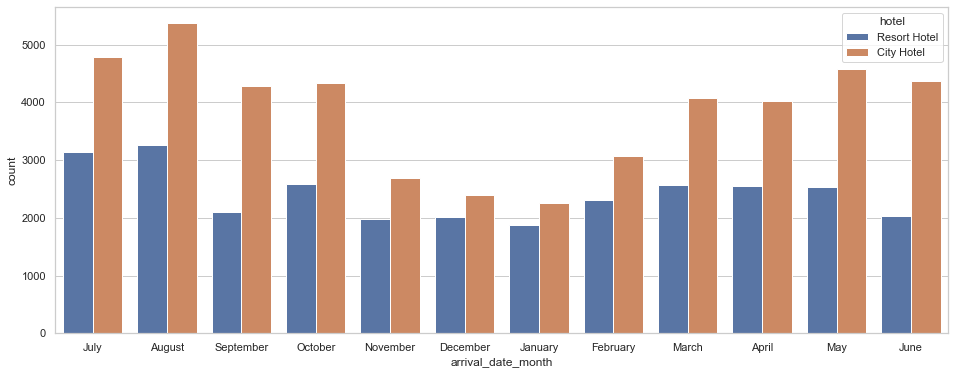

In [69]:
plt.figure(figsize = (16,6))
sns.countplot(x ='arrival_date_month',hue='hotel', data=data1)

In [70]:
months_original = pd.DataFrame(data.groupby('arrival_date_month')['arrival_date_month'].count())
months_cleaned = pd.DataFrame(data1.groupby('arrival_date_month')['arrival_date_month'].count())
print(months_original)
print(months_cleaned)

                    arrival_date_month
arrival_date_month                    
April                            11089
August                           13877
December                          6780
February                          8068
January                           5929
July                             12661
June                             10939
March                             9794
May                              11791
November                          6794
October                          11160
September                        10508
                    arrival_date_month
arrival_date_month                    
April                             6565
August                            8638
December                          4409
February                          5372
January                           4122
July                              7919
June                              6404
March                             6645
May                               7114
November                 

```This graph also shows much less bookings for all months but the overall trend that shows July and August
are the busiest month is the same```

# 4. Count of Number of Cancellations per month by 

/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'outer'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


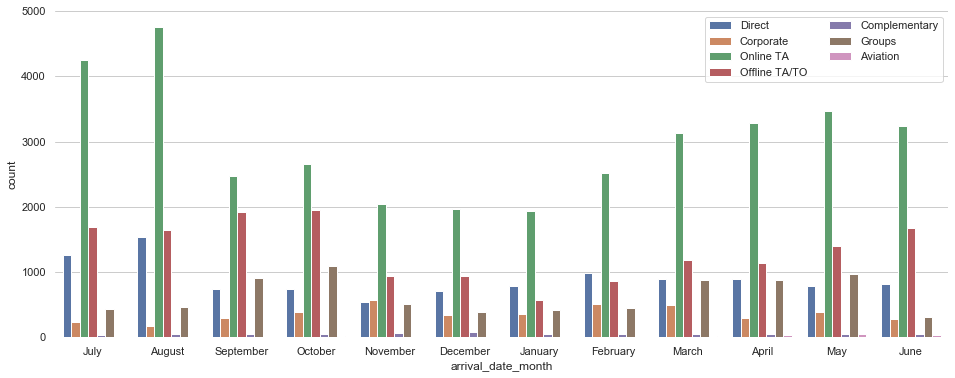

In [71]:
plt.figure(figsize = (16,6))
sns.countplot(x ='arrival_date_month', hue='market_segment', data=data1)
plt.legend(ncol = 2, loc = 'outer')
sns.despine(left = True, bottom = True)

# 5. Price per Room per Night

In [72]:
#Let us divide by Hotel type first 
rh1 = data1.loc[(data1["hotel"] == "Resort Hotel")]
ch1 = data1.loc[(data1["hotel"] == "City Hotel")]

#Average prices
rh_ppp = sum(rh1['adr']) / sum(rh1["adults"]) 
ch_ppp = sum(ch1['adr']) / sum(ch1["adults"]) 

print("""Resort hotel average price: ${:.2f} per night per person.
City hotel average price: ${:.2f} per night per person.""".format(rh_ppp, ch_ppp))

Resort hotel average price: $49.55 per night per person.
City hotel average price: $57.84 per night per person.


```This is also a decreade from previous data1```

(-20, 200)

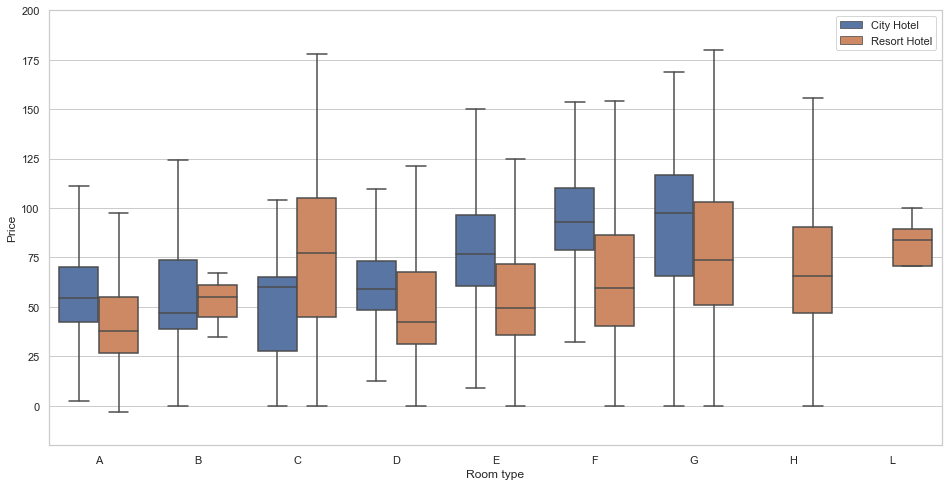

In [73]:
#Add ppp to original dataframe to be called
data1["adr_ppp"] = data1["adr"] / (data1["adults"] )

#Create room prices slice of dataframe
room_prices = data1[["hotel", "reserved_room_type", "adr_ppp"]].sort_values("reserved_room_type")

#Plot the BoxPlot of Data of ppp for the Room Type and Hotel Type
plt.figure(figsize=(16, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_ppp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.xlabel("Room type")
plt.ylabel("Price")
plt.legend(loc="upper right")
plt.ylim(-20, 200)

```After the data is cleaned for actual bookings it is interesting to see that only one types of room i.e. C has an average price higher in Resort hotels than in City Hotels. Overall it seems that the vast cluster of prices for type of room varies alot for both City and Resport Hotel. Usually, there is a wide range for both Resort and City Hotels for their proce distribution. ```

# 6. Average Number of Guests per Night

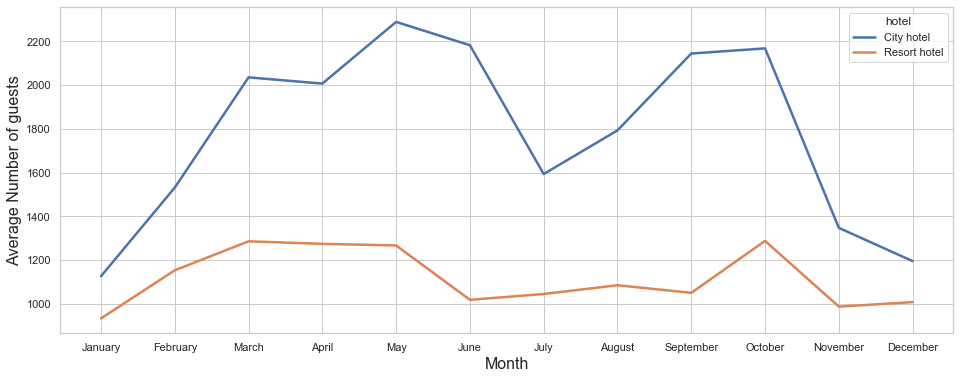

In [74]:
# Create a DateFrame with the relevant data:
resort_guests_monthly = rh1.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch1.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})
city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

#show figure:
plt.figure(figsize=(16, 6))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.xlabel("Month", fontsize=16)
plt.ylabel("Average Number of guests", fontsize=16)
plt.show()

```The overall trend of the City having a larger number of guests remains. We also see the steep decline in guets as winter months continue```